In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('AAP_data.csv')

In [ ]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,132.439631,133.818297,131.036025,132.433463,1.078043e+06
std,31.269628,31.545809,30.968405,31.274463,1.019365e+06
min,76.040000,76.660000,75.623000,76.180000,1.307120e+05
25%,104.070000,105.724950,102.260000,104.440000,6.182010e+05
50%,141.150000,143.000000,139.405000,141.300000,8.491350e+05
75%,156.980000,158.270000,155.320000,156.730000,1.219762e+06
max,201.240000,201.240000,198.160000,200.380000,1.974952e+07


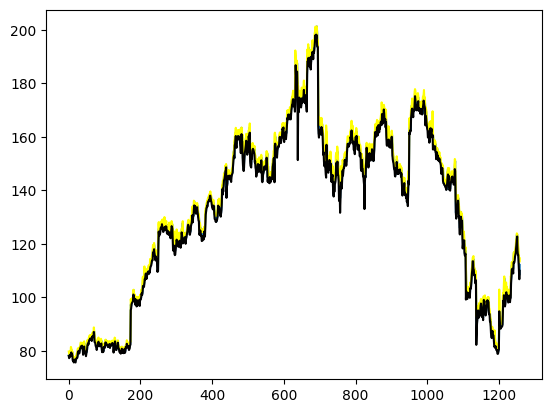

In [ ]:
plt.plot(df.index, df['open'])
plt.plot(df['high'], color='yellow')
plt.plot(df.index, df['low'], color='black')
plt.show()

open      0
high      0
low       0
close     0
volume    0
dtype: int64
             open   high      low  close     volume  average
date                                                        
2013-02-08  78.34  79.72  78.0100  78.90  1298137.0  78.7425
2013-02-09  78.34  79.72  78.0100  78.90  1298137.0  78.7425
2013-02-10  78.34  79.72  78.0100  78.90  1298137.0  78.7425
2013-02-11  78.65  78.91  77.2300  78.39   758016.0  78.2950
2013-02-12  78.39  78.63  77.5132  78.60   876859.0  78.2833


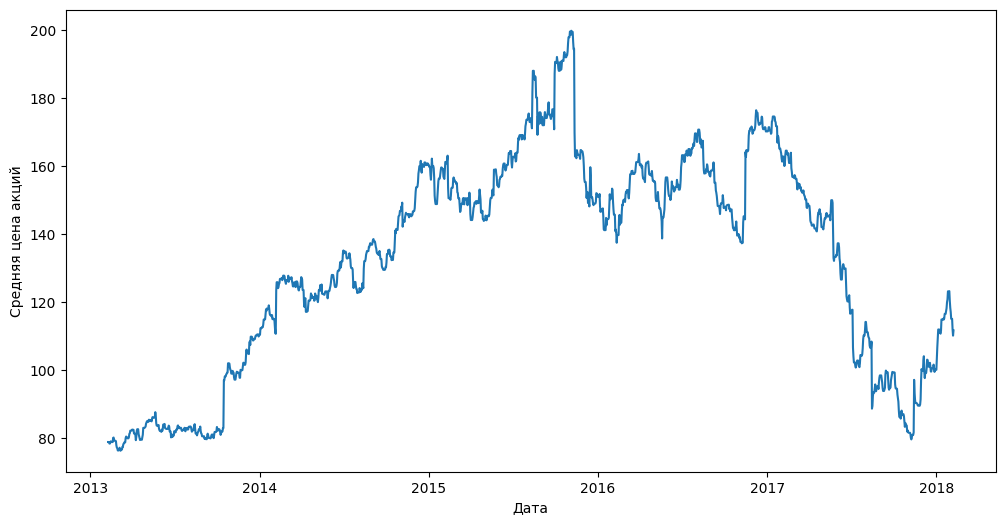

In [ ]:
df
# установка индекса датафрейма
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# ресемплирование данных для ежедневного интервала
df = df.resample('D').last().ffill()

# проверка наличия пропущенных значений
print(df.isna().sum())

# добавление столбца со средней ценой акции
df['average'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4

# вывод первых 5 строк датафрейма для проверки
print(df.head())

# построение графика изменения средней цены акций
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['average'])
plt.xlabel('Дата')
plt.ylabel('Средняя цена акций')
plt.show()



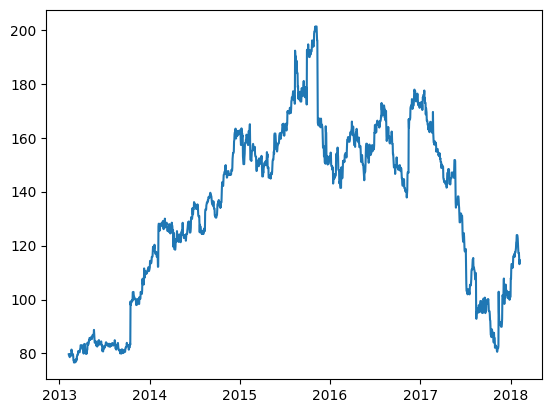

In [ ]:
plt.figsize=(10,7)
plt.plot(df['high'])
plt.show()

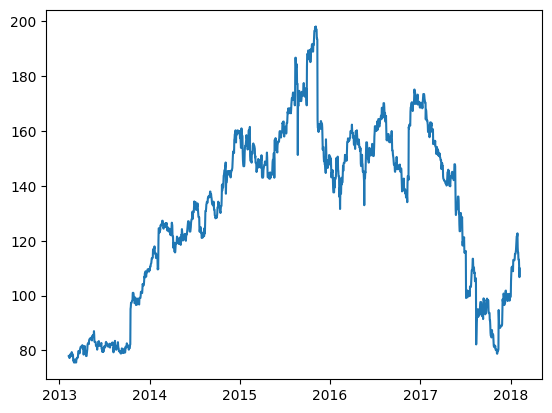

In [ ]:
plt.figsize=(10,7)
plt.plot(df['low'])
plt.show()

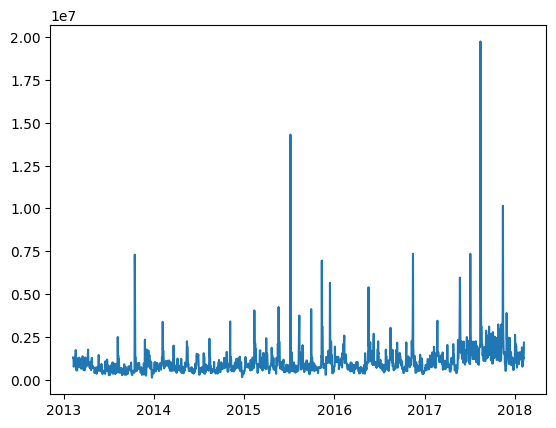

In [ ]:
plt.figsize=(10,7)
plt.plot(df['volume'])
plt.show()

In [ ]:
df_tra = pd.DataFrame(index=df.index)
df_tra['volume'] = df.volume
df_tra

,volume
date,
2013-02-08,1298137.0
2013-02-09,1298137.0
2013-02-10,1298137.0
2013-02-11,758016.0
2013-02-12,876859.0
...,...
2018-02-03,1092333.0
2018-02-04,1092333.0
2018-02-05,1281592.0


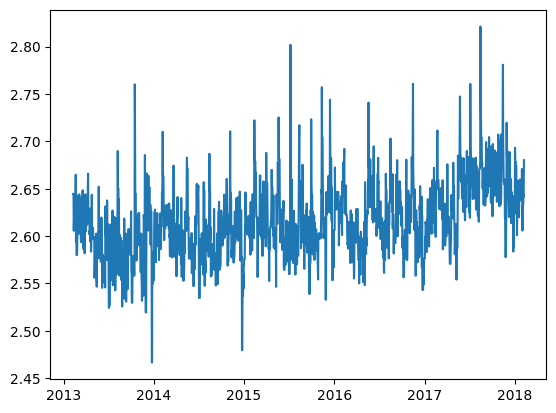

In [ ]:
import numpy as np
df_tra.volume = np.log(df_tra['volume'])
# from sklearn.preprocessing import StandardScaler

# # Создать экземпляр класса StandardScaler
# scaler = StandardScaler()

# # Применить метод fit_transform() для стандартизации столбца
# df_tr.volume = scaler.fit_transform(df_tr.volume.values.reshape(-1, 1))


plt.plot(df_tra)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Создать модель ARIMA
model = ARIMA(df_tra, order=(2, 1, 2))

# Обучить модель на данных
model_fit = model.fit()

pred = model_fit.predict(start='2016-02-01', end='2018-02-07')

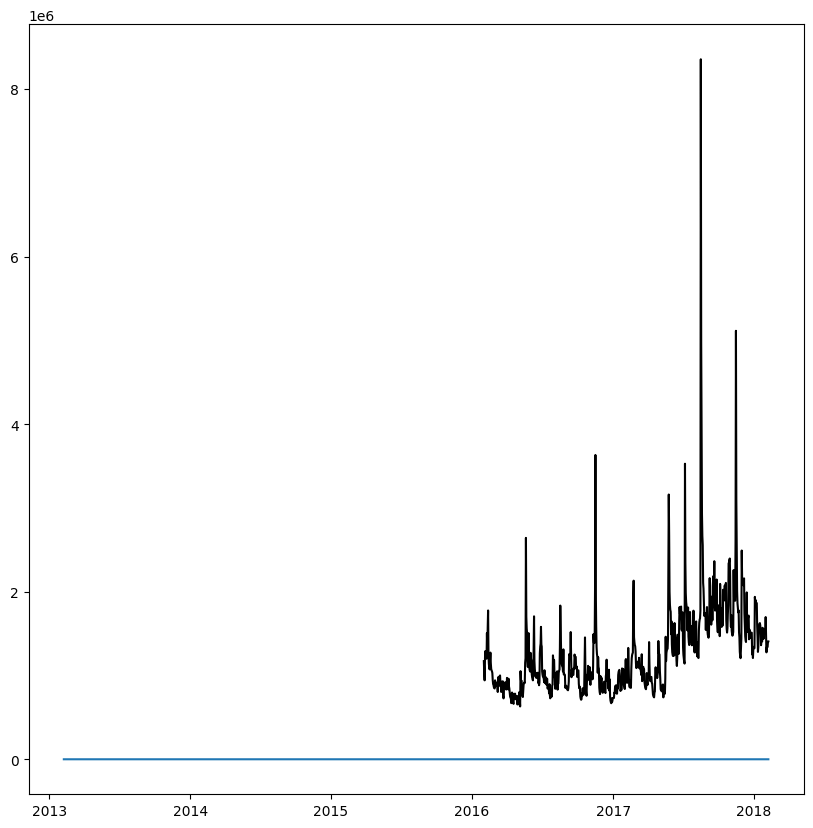

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(df_tra)
plt.plot(pred, color='black')
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=len(df_tra['2016-02-01':'2018-02-07']))
mae = mean_absolute_error(df_tra['2016-02-01':'2018-02-07'], pred)
mse = mean_squared_error(df_tra['2016-02-01':'2018-02-07'], pred)


print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

MAE: 1271053.067
MSE: 1926043219040.404
